In [27]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [28]:
ticker_list = ['SOL-USD','ETH-USD','BTC-USD']

In [30]:
import pandas as pd
import yfinance as yf
import datetime as dt

start_date = dt.datetime(2011, 1, 1)
end_date = dt.datetime(2024, 12, 5)

ticker_list = ["BTC-USD"]
data = yf.download(ticker_list, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1))
weekly_data = data.resample('W').last()
weekly_returns = weekly_data['Adj Close'].pct_change().dropna()
weekly_returns.index = weekly_returns.index.tz_localize(None)
weekly_data.index = weekly_data.index.tz_localize(None)

print("Weekly Adjusted Close Percentage Change:")
print(weekly_returns)

print("\nWeekly OHLC and Volume Data:")
print(weekly_data)# Plot Weekly Returns

[*********************100%***********************]  1 of 1 completed

Weekly Adjusted Close Percentage Change:
Ticker       BTC-USD
Date                
2014-09-28 -0.054260
2014-10-05 -0.150249
2014-10-12  0.181083
2014-10-19  0.029050
2014-10-26 -0.089443
...              ...
2024-11-10  0.170685
2024-11-17  0.116456
2024-11-24  0.090911
2024-12-01 -0.007489
2024-12-08  0.015304

[533 rows x 1 columns]

Weekly OHLC and Volume Data:
Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2014-09-21    398.821014    398.821014    412.425995    393.181000   
2014-09-28    377.181000    377.181000    401.016998    374.332001   
2014-10-05    320.510010    320.510010    341.800995    289.295990   
2014-10-12    378.549011    378.549011    379.433014    356.144012   
2014-10-19    389.545990    389.545990    393.938995    386.457001   
...                  ...           ...           ...           ...   
20

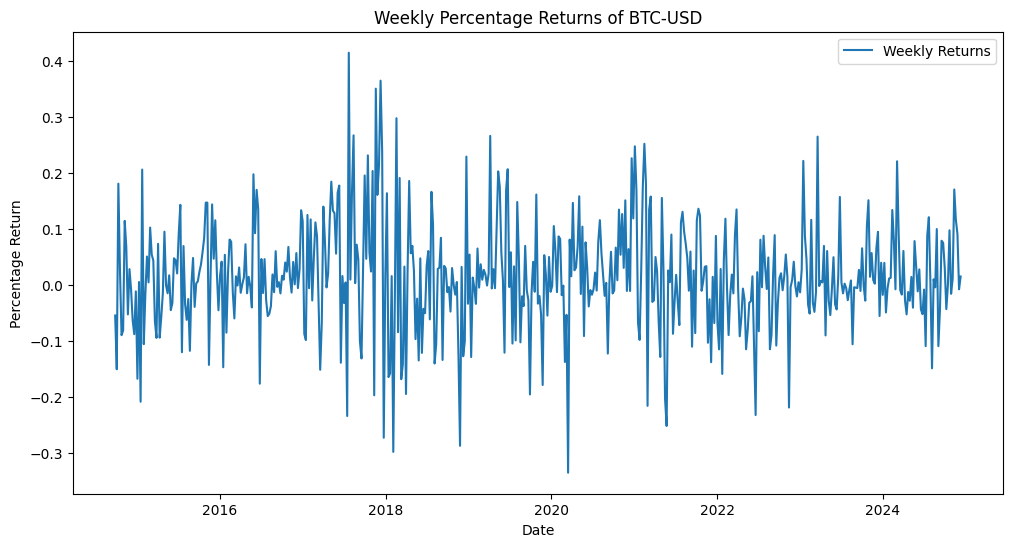

In [32]:
# Plot Weekly Returns
plt.figure(figsize=(12, 6))
plt.plot(weekly_returns, label='Weekly Returns')
plt.title('Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.show()

In [33]:
# Perform ADF test
adf_result = adfuller(weekly_returns)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.422259
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


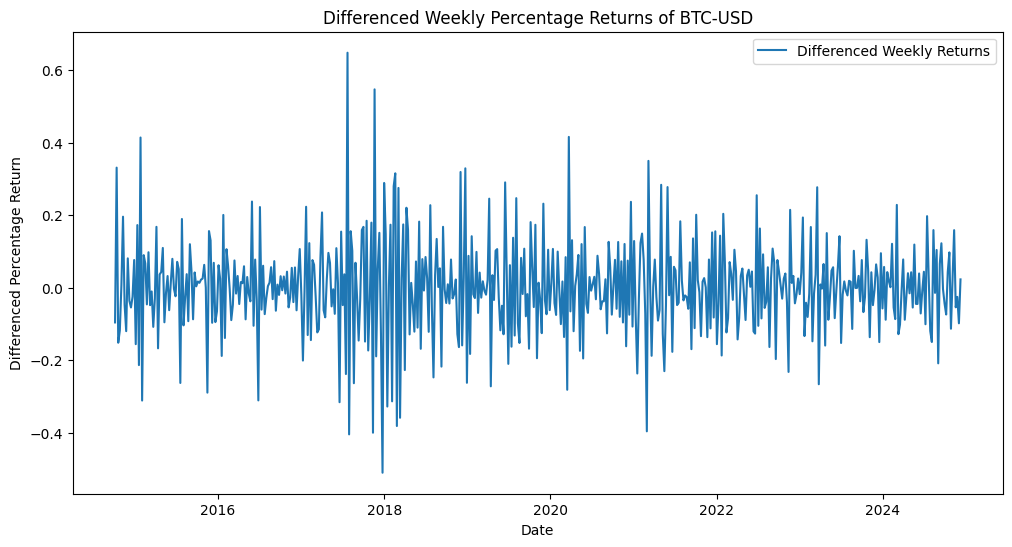

ADF Statistic (Differenced): -9.993353
p-value (Differenced): 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [34]:
# Since p-value > 0.05, difference the data
weekly_returns_diff = weekly_returns.diff().dropna()

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(weekly_returns_diff, label='Differenced Weekly Returns')
plt.title('Differenced Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Differenced Percentage Return')
plt.legend()
plt.show()

# Perform ADF test on differenced data
adf_result_diff = adfuller(weekly_returns_diff)

print('ADF Statistic (Differenced): %f' % adf_result_diff[0])
print('p-value (Differenced): %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

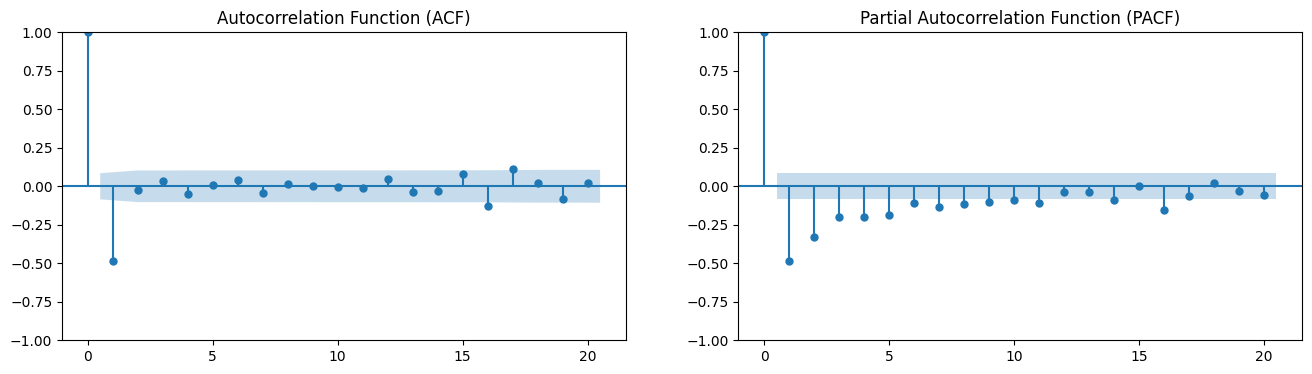

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16,4))

plot_acf(weekly_returns_diff, ax=ax[0], lags=20)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(weekly_returns_diff, ax=ax[1], lags=20, method='ywm')
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [39]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import pmdarima as pm

# 1. Fetch and Prepare the Data
start_date = dt.datetime(2011, 1, 1)
end_date = dt.datetime(2024, 12, 5)
ticker_list = ["BTC-USD"]
data = yf.download(ticker_list, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1))
weekly_data = data.resample('W').last()
weekly_returns = weekly_data['Adj Close'].pct_change().dropna()
weekly_returns.index = weekly_returns.index.tz_localize(None)
weekly_data.index = weekly_data.index.tz_localize(None)

# 2. Visualize the Data
plt.figure(figsize=(12, 6))
plt.plot(weekly_returns, label='Weekly Returns')
plt.title('Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.show()

# 3. Check for Stationarity
adf_result = adfuller(weekly_returns)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# 4. Differencing if needed
if adf_result[1] > 0.05:
    weekly_returns_diff = weekly_returns.diff().dropna()
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_returns_diff, label='Differenced Weekly Returns')
    plt.title('Differenced Weekly Percentage Returns of BTC-USD')
    plt.xlabel('Date')
    plt.ylabel('Differenced Percentage Return')
    plt.legend()
    plt.show()

    # ADF test on differenced data
    adf_result_diff = adfuller(weekly_returns_diff)
    print('ADF Statistic (Differenced): %f' % adf_result_diff[0])
    print('p-value (Differenced): %f' % adf_result_diff[1])
    print('Critical Values:')
    for key, value in adf_result_diff[4].items():
        print('\t%s: %.3f' % (key, value))
else:
    weekly_returns_diff = weekly_returns.copy()

# 5. Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16,4))
plot_acf(weekly_returns_diff, ax=ax[0], lags=20)
ax[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(weekly_returns_diff, ax=ax[1], lags=20, method='ywm')
ax[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()

# 6. Auto ARIMA to find the best parameters
auto_model = pm.auto_arima(weekly_returns, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=False,
                           d=1 if adf_result[1] > 0.05 else 0,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_model.summary())

# 7. Fit the ARIMA Model
order = auto_model.order
model = ARIMA(weekly_returns, order=order)
model_fit = model.fit()
print(model_fit.summary())

# 8. Model Diagnostics
residuals = model_fit.resid

plt.figure(figsize=(12,6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

ljung_box = acorr_ljungbox(residuals, lags=20, return_df=True)
print(ljung_box)

# 9. Forecasting
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(weekly_returns, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:,0],
                 forecast_conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('BTC-USD Weekly Returns Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Percentage Return')
plt.legend()
plt.show()

print("Forecasted Weekly Returns:")
print(forecast_mean)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model
model = ARIMA(weekly_returns, order=(1,1,1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def forecast_timeseries(data, forecast_steps=30):
    """
    Forecast Bitcoin prices using an ARIMA model.
    :param data: DataFrame containing historical prices with a 'Date' and 'Adj Close' column.
    :param forecast_steps: Number of days to forecast.
    :return: Forecasted values and the model summary.
    """
    # Convert 'Date' to datetime and set as index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Ensure the data is sorted by date
    data = data.sort_index()

    # Convert 'Adj Close' to numeric and handle missing values
    data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')
    if data['Adj Close'].isnull().sum() > 0:
        print("Handling missing values...")
        data['Adj Close'].fillna(method='ffill', inplace=True)
        data['Adj Close'].fillna(method='bfill', inplace=True)

    # Extract the 'Adj Close' column for forecasting
    adj_close = data['Adj Close']

    # Fit the ARIMA model
    model = ARIMA(adj_close, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=forecast_steps)

    # Create a DataFrame for the forecast
    forecast_dates = pd.date_range(start=adj_close.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': forecast})

    return forecast_df, model_fit


# Load the data
file_path = 'BTC-USD_historical_data.csv'
data = pd.read_csv(file_path)

# Forecast
forecast_steps = 30
forecast_df, model_fit = forecast_timeseries(data, forecast_steps)

# Save and display forecast
forecast_df.to_csv('bitcoin_forecast.csv', index=False)
print(forecast_df)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Historical Prices')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Forecast')
plt.legend()
plt.grid()
plt.show()


Handling missing values...


/var/folders/qz/88_zwk1j127frfv5cjwlj9v00000gn/T/ipykernel_23193/1014566276.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Adj Close'].fillna(method='ffill', inplace=True)
/var/folders/qz/88_zwk1j127frfv5cjwlj9v00000gn/T/ipykernel_23193/1014566276.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'].fillna(method='ffill', inplace=True)
/var/folders/qz/88_zwk1j127frfv5cjwlj9v00000gn/T/ipykernel_23193/1014566276

ValueError: Neither `start` nor `end` can be NaT